In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import mlem
import io
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix



In [1]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/immobili.csv"

In [6]:
df = pd.read_csv(path)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   indus    506 non-null    float64
 1   tax      506 non-null    float64
 2   ptratio  506 non-null    float64
 3   lstat    506 non-null    float64
 4   price    506 non-null    float64
dtypes: float64(5)
memory usage: 19.9 KB


In [15]:
df = df.drop(index=df.index[-1])

In [16]:
df = df.astype(float)

In [22]:
df = df.rename(columns={'medv': 'price'})

In [23]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<Axes: >

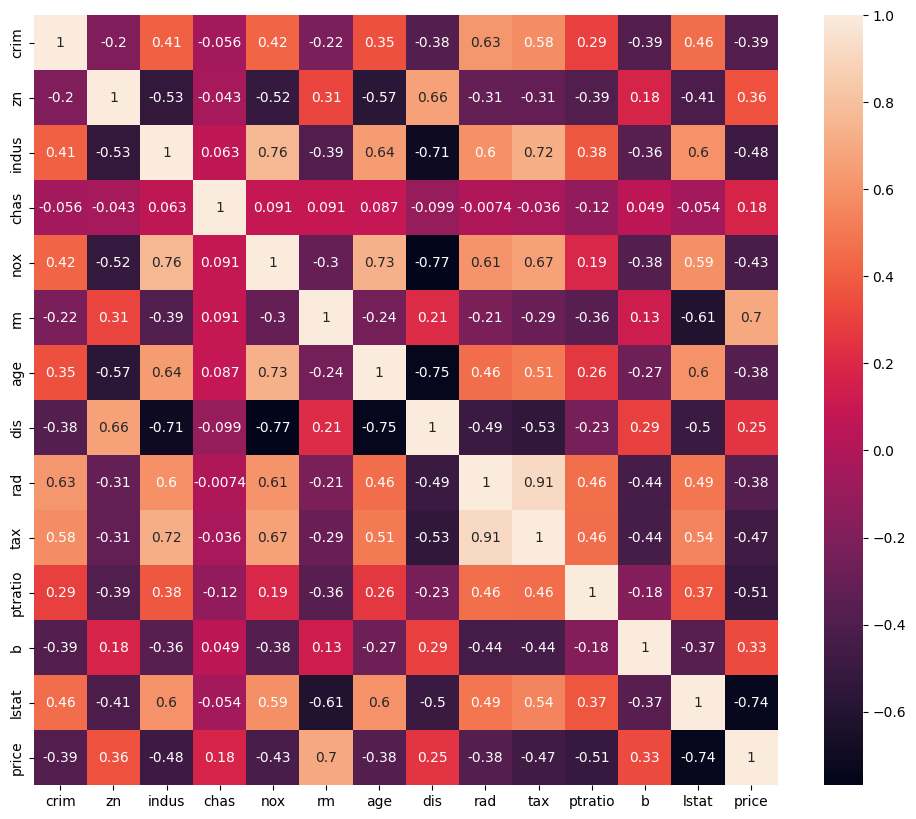

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)


In [41]:
['crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'b']
df = df.drop(['crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'b'], axis=1)

In [42]:
df

,indus,tax,ptratio,lstat,price
0,2.31,296.0,15.3,4.98,24.0
1,7.07,242.0,17.8,9.14,21.6
2,7.07,242.0,17.8,4.03,34.7
3,2.18,222.0,18.7,2.94,33.4
4,2.18,222.0,18.7,5.33,36.2
...,...,...,...,...,...
501,11.93,273.0,21.0,9.67,22.4
502,11.93,273.0,21.0,9.08,20.6
503,11.93,273.0,21.0,5.64,23.9
504,11.93,273.0,21.0,6.48,22.0


In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cbar=False, cmap='viridis')
plt.title('Distribuzione dei valori mancanti nel dataset')
plt.show()

C:\Users\ifoa\AppData\Local\Temp\ipykernel_10412\4229186827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=False, cmap='viridis')


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x600 with 0 Axes>